In [1]:
import sys
import os
import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from nltk.corpus import stopwords

In [2]:
root_dir = 'C:/Users/delst/OneDrive/Desktop/Code/Workspace/NLP_Disaster_Tweets'
sys.path.append(root_dir)

from A_Main.Configurations.setup_env import setup_environment
config = setup_environment(root_dir)

fig_size = config.fig_size_m

---

In [3]:
# Read csv
train_data_dir = config.raw_data_train
test_data_dir = config.raw_data_test

df_train = pd.read_csv(train_data_dir)
df_test = pd.read_csv(test_data_dir)

display(df_train.head())
display(df_test.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
df_train[35:40]

,id,keyword,location,text,target
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0


---

In [5]:
df_train.shape

(7613, 5)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df_test.shape

(3263, 4)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


---

In [9]:
def standard_metadata(df):
    nan_count = df.isna().sum()
    nan_percent = round(nan_count / len(df) * 100, 2)
    
    target_vcs = df.target.value_counts()
    target_percent = round(target_vcs / len(df) * 100, 2)
    
    duplicate_count = df.duplicated().sum()
    duplicate_percent = round(duplicate_count / len(df) * 100, 2)
    
    metadata = {
        'nan_count': nan_count,
        'nan_percent': nan_percent,
        'target_vcs': target_vcs,
        'target_percent': target_percent,
        'duplicate_count': duplicate_count,
        'duplicate_percent': duplicate_percent
    }
    
    return metadata

metadata = standard_metadata(df_train)
pprint.pprint(metadata)

{'duplicate_count': 0,
 'duplicate_percent': 0.0,
 'nan_count': id             0
keyword       61
location    2533
text           0
target         0
dtype: int64,
 'nan_percent': id           0.00
keyword      0.80
location    33.27
text         0.00
target       0.00
dtype: float64,
 'target_percent': 0    57.03
1    42.97
Name: target, dtype: float64,
 'target_vcs': 0    4342
1    3271
Name: target, dtype: int64}


---

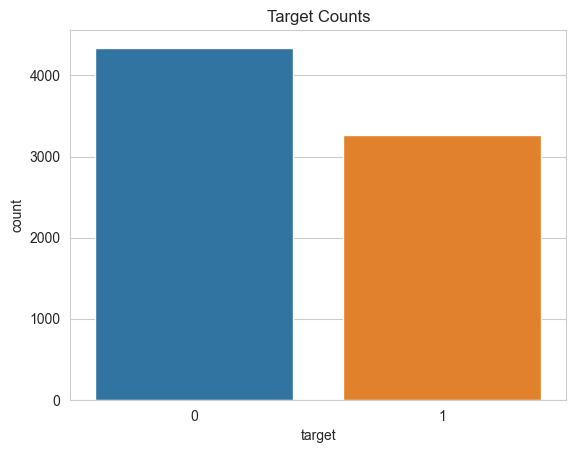

In [10]:
# bar plot of target counts
sns.countplot(x='target', data=df_train)
plt.title('Target Counts')
plt.show()

---

In [11]:
tokens_to_remove = ['http', '@', '.com']
text = df_train['text']

def string_search(text, search_strings):
    count_dict = {}
    for string in search_strings:
        count_dict[string] = text.str.count(string).sum()
    return count_dict

tokens_to_remove_counts = string_search(text, tokens_to_remove)
pprint.pprint(tokens_to_remove_counts)

{'.com': 352, '@': 2759, 'http': 4722}


In [12]:
print(list(tokens_to_remove_counts.keys()))
print(list(tokens_to_remove_counts.values()))

['http', '@', '.com']
[4722, 2759, 352]


---

In [15]:
def words_per_doc(text):
    # Doc length, word
    return text.str.split().map(lambda x: len(x))

def chars_per_doc(text):
    # Doc length, chars
    return text.str.len()

def avg_word_length_per_doc(text):
    return text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

def stopwords_per_doc(text):
    stop = stopwords.words('english')
    return text.str.split().apply(lambda x : [i for i in x if i in stop]).map(lambda x: len(x))

def unique_words_per_doc(text):
    return text.str.split().apply(lambda x : len(set(x)))

# Define your plotting function
def plot_distribution(df_train, df_test, column, func, title):
    plt.figure(figsize=config.fig_size_m)

    sns.histplot(data=func(df_train[column]), fill=True, label='Train', kde=True, stat="density")
    sns.histplot(data=func(df_test[column]), fill=True, label='Test', kde=True, stat="density")
    
    # sns.histplot(data=func(df_train[column]), fill=True, label='Train', kde=True)
    # sns.histplot(data=func(df_test[column]), fill=True, label='Test', kde=True)
    
    plt.title(title)
    plt.legend()
    plt.show()

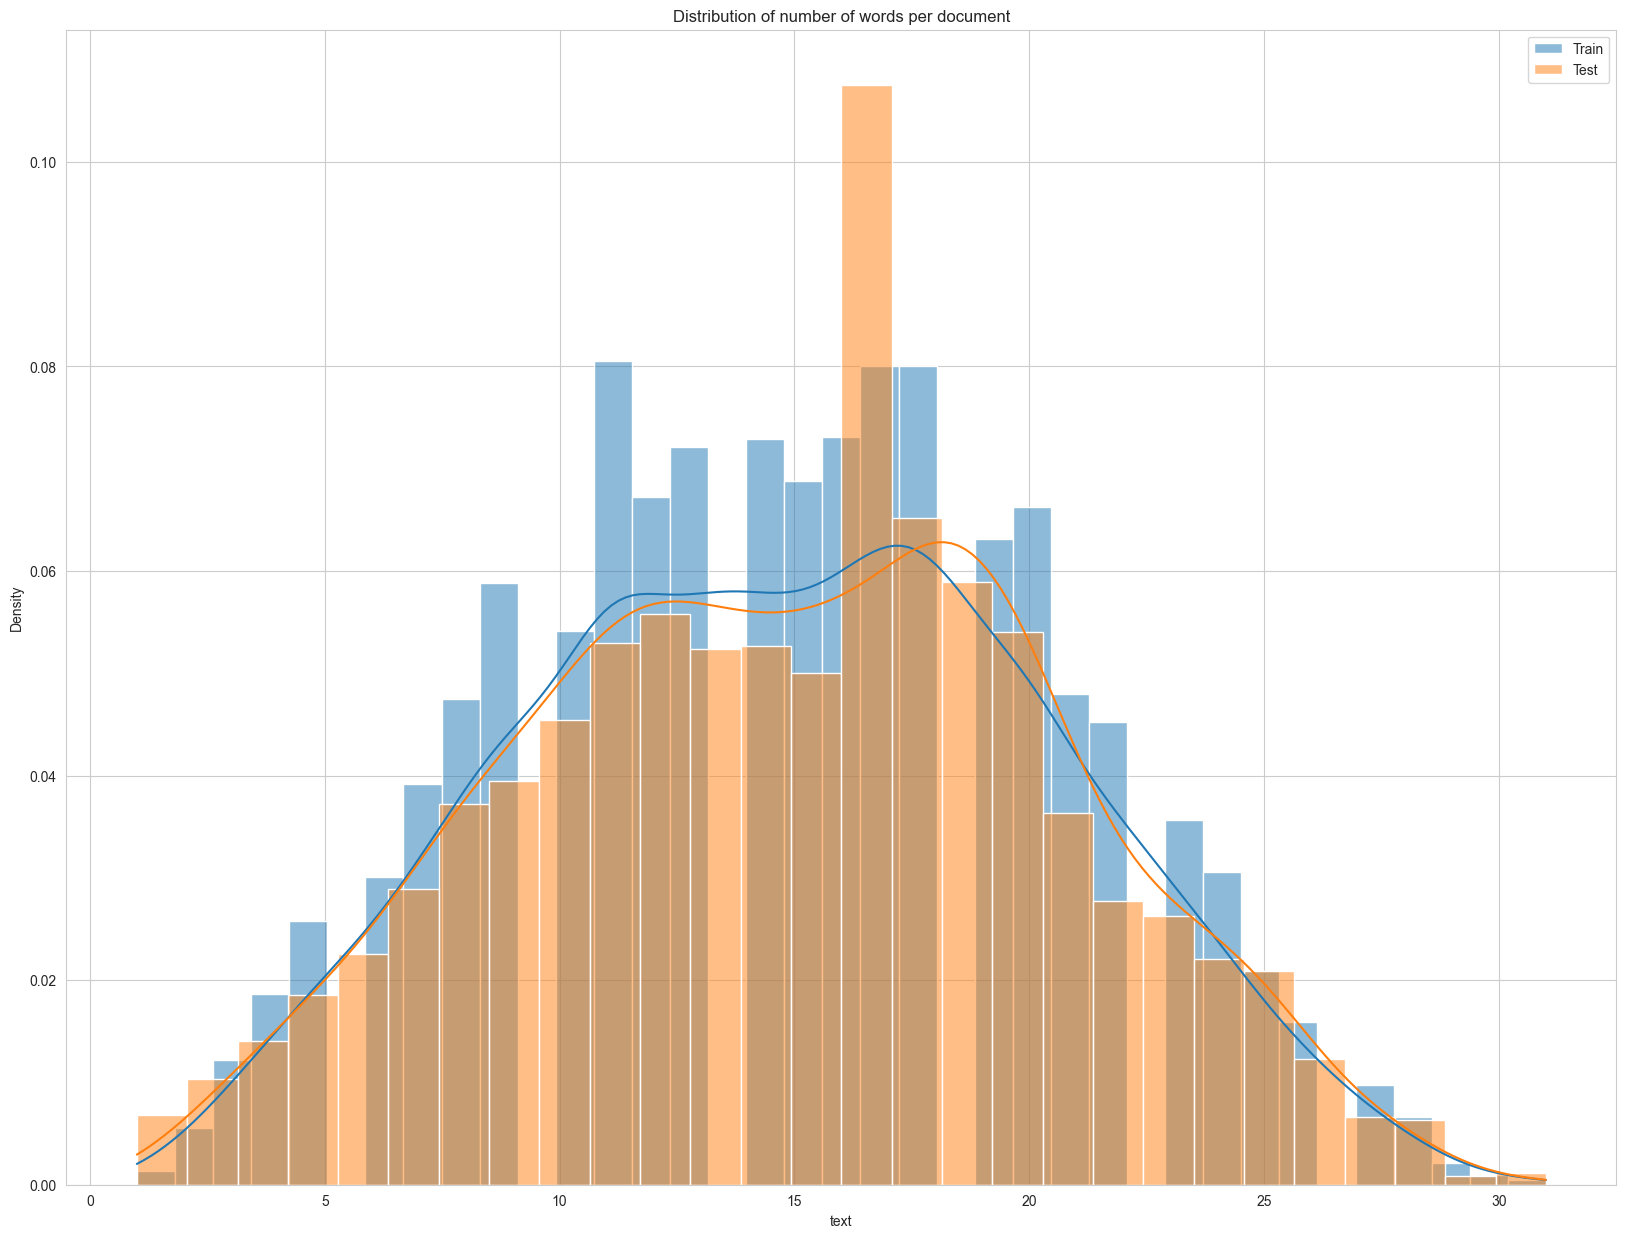

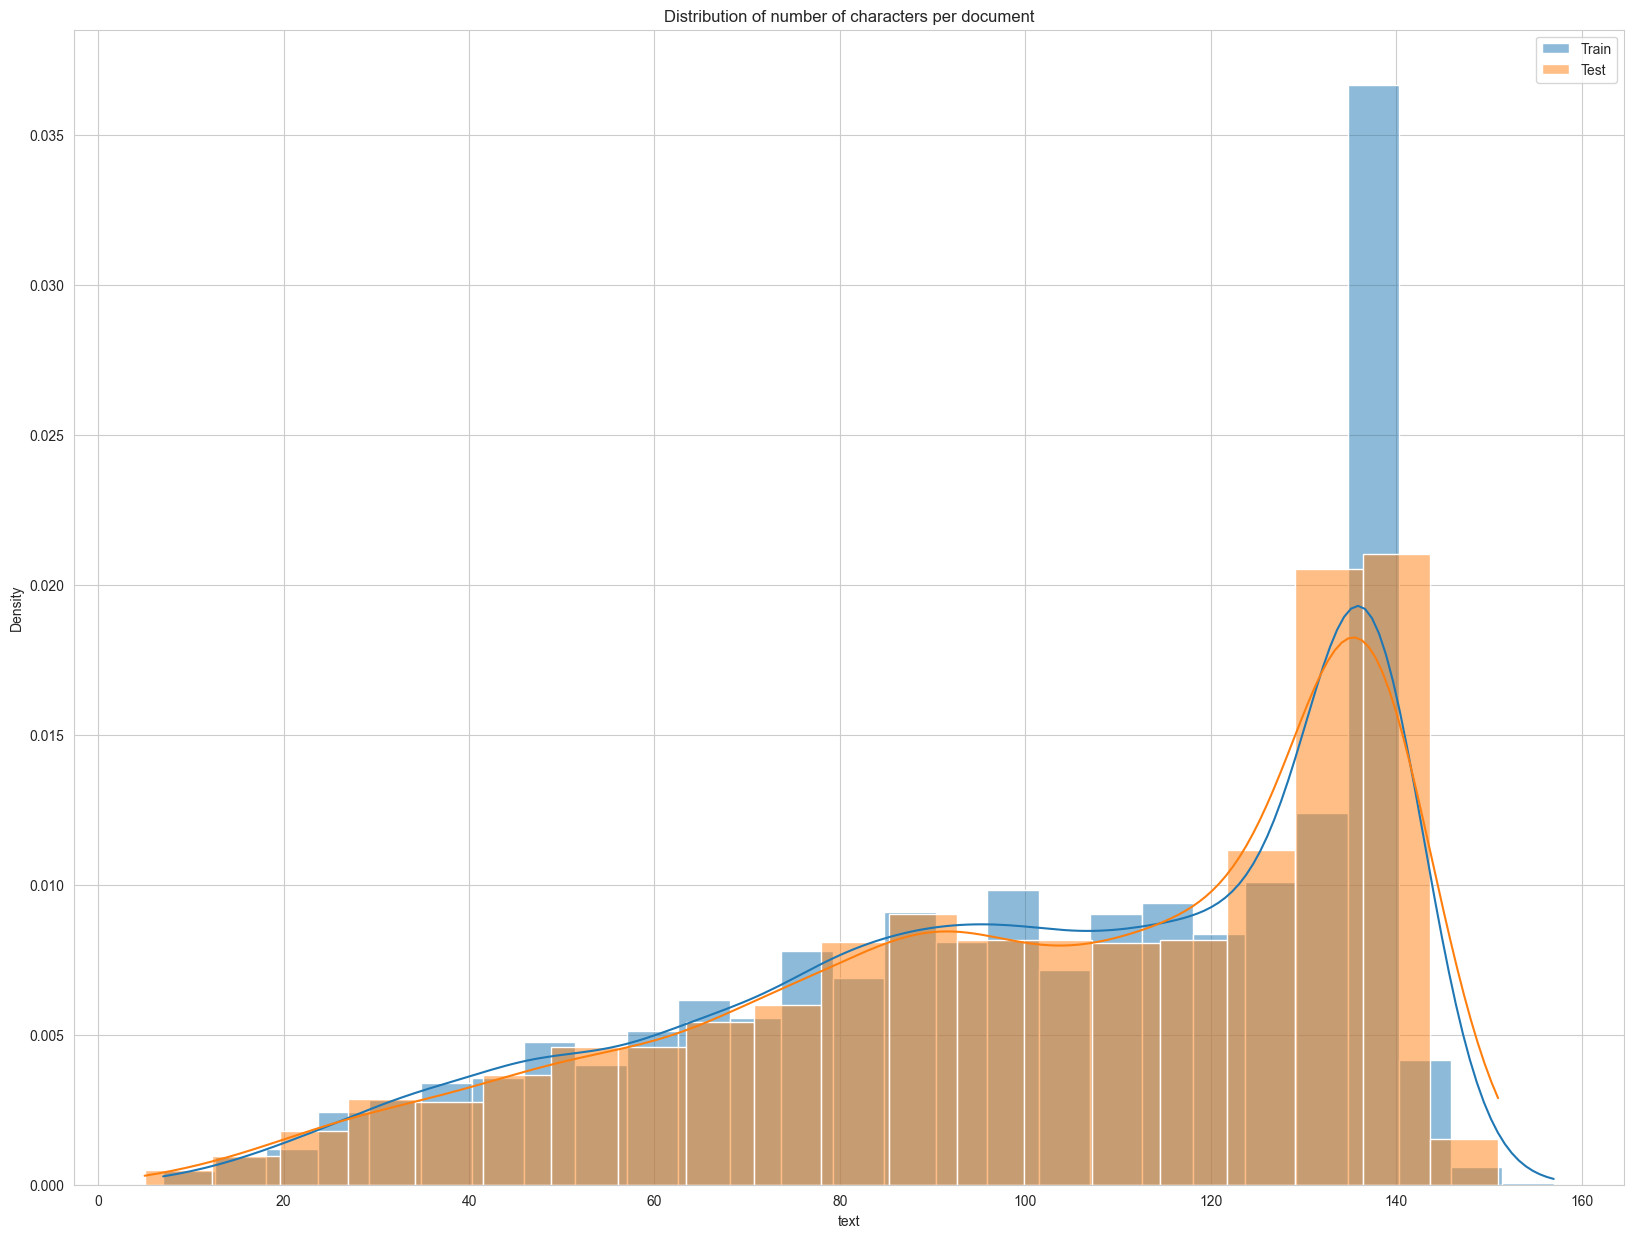

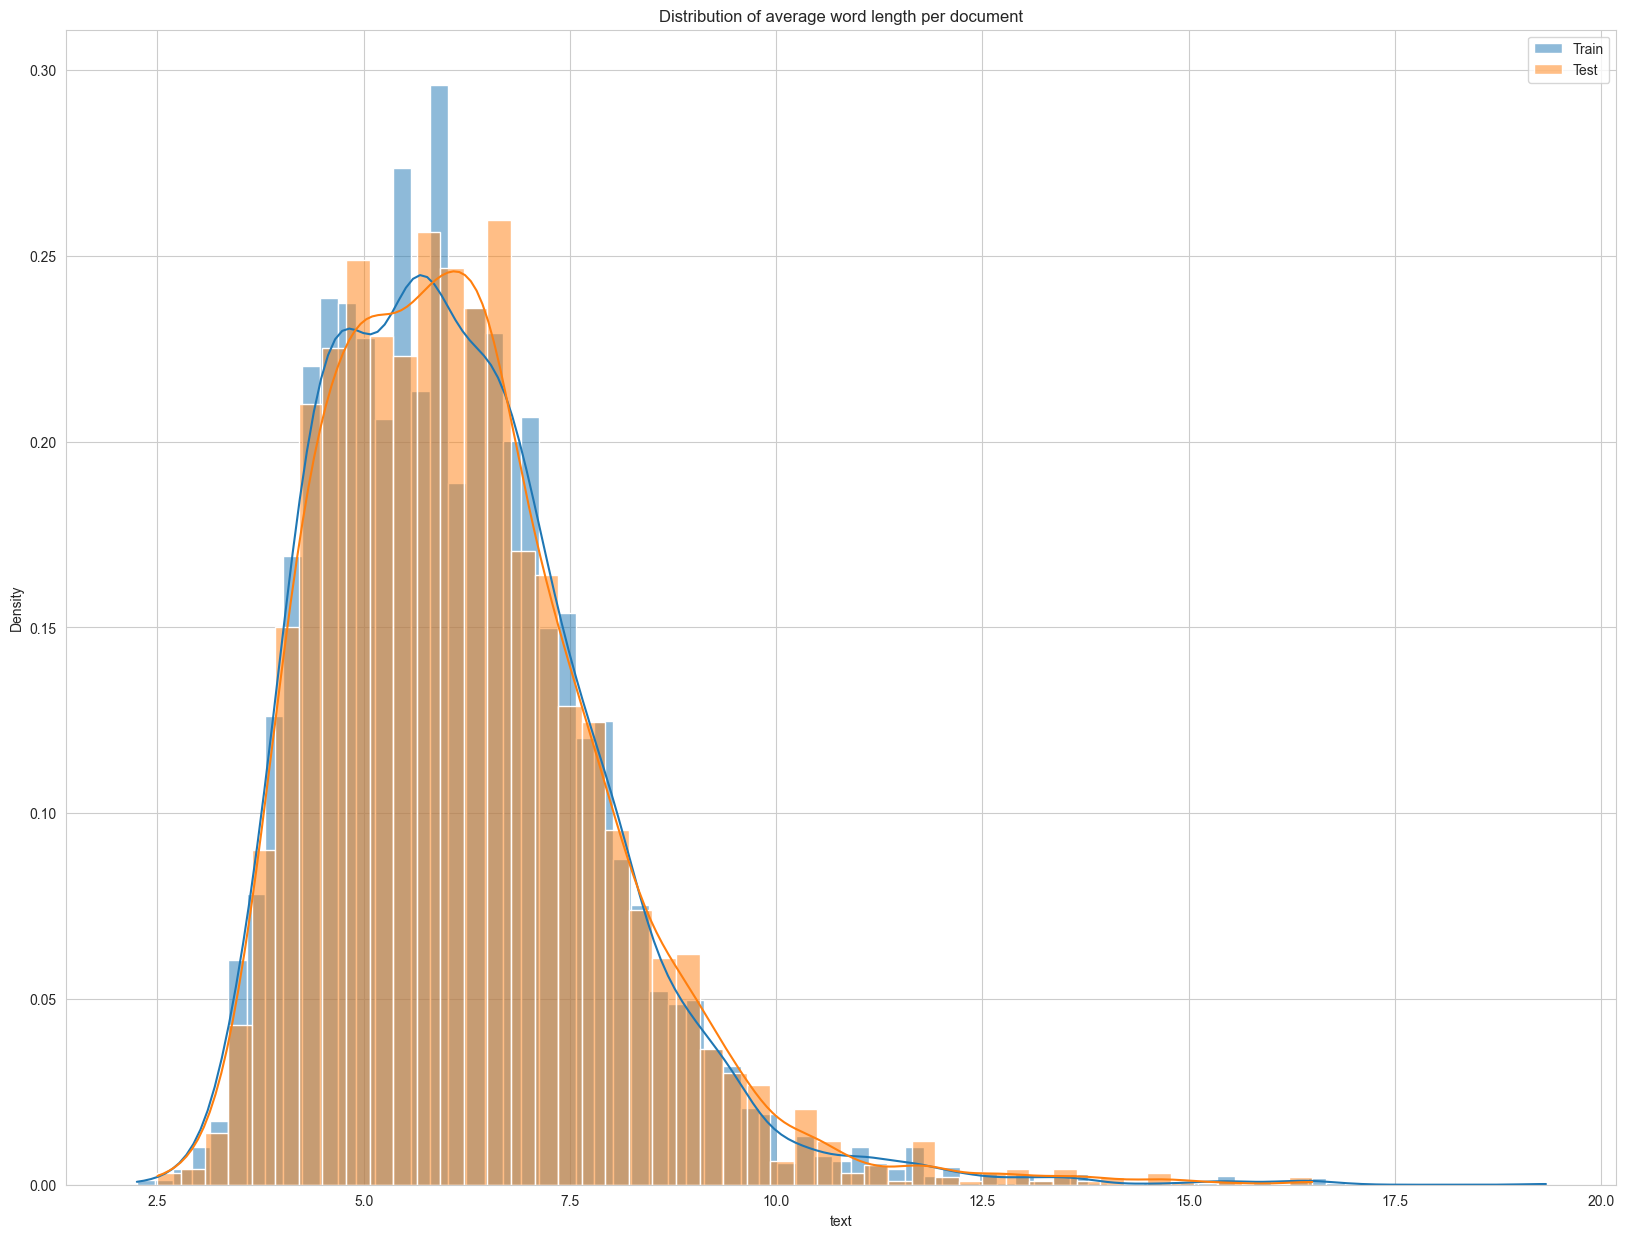

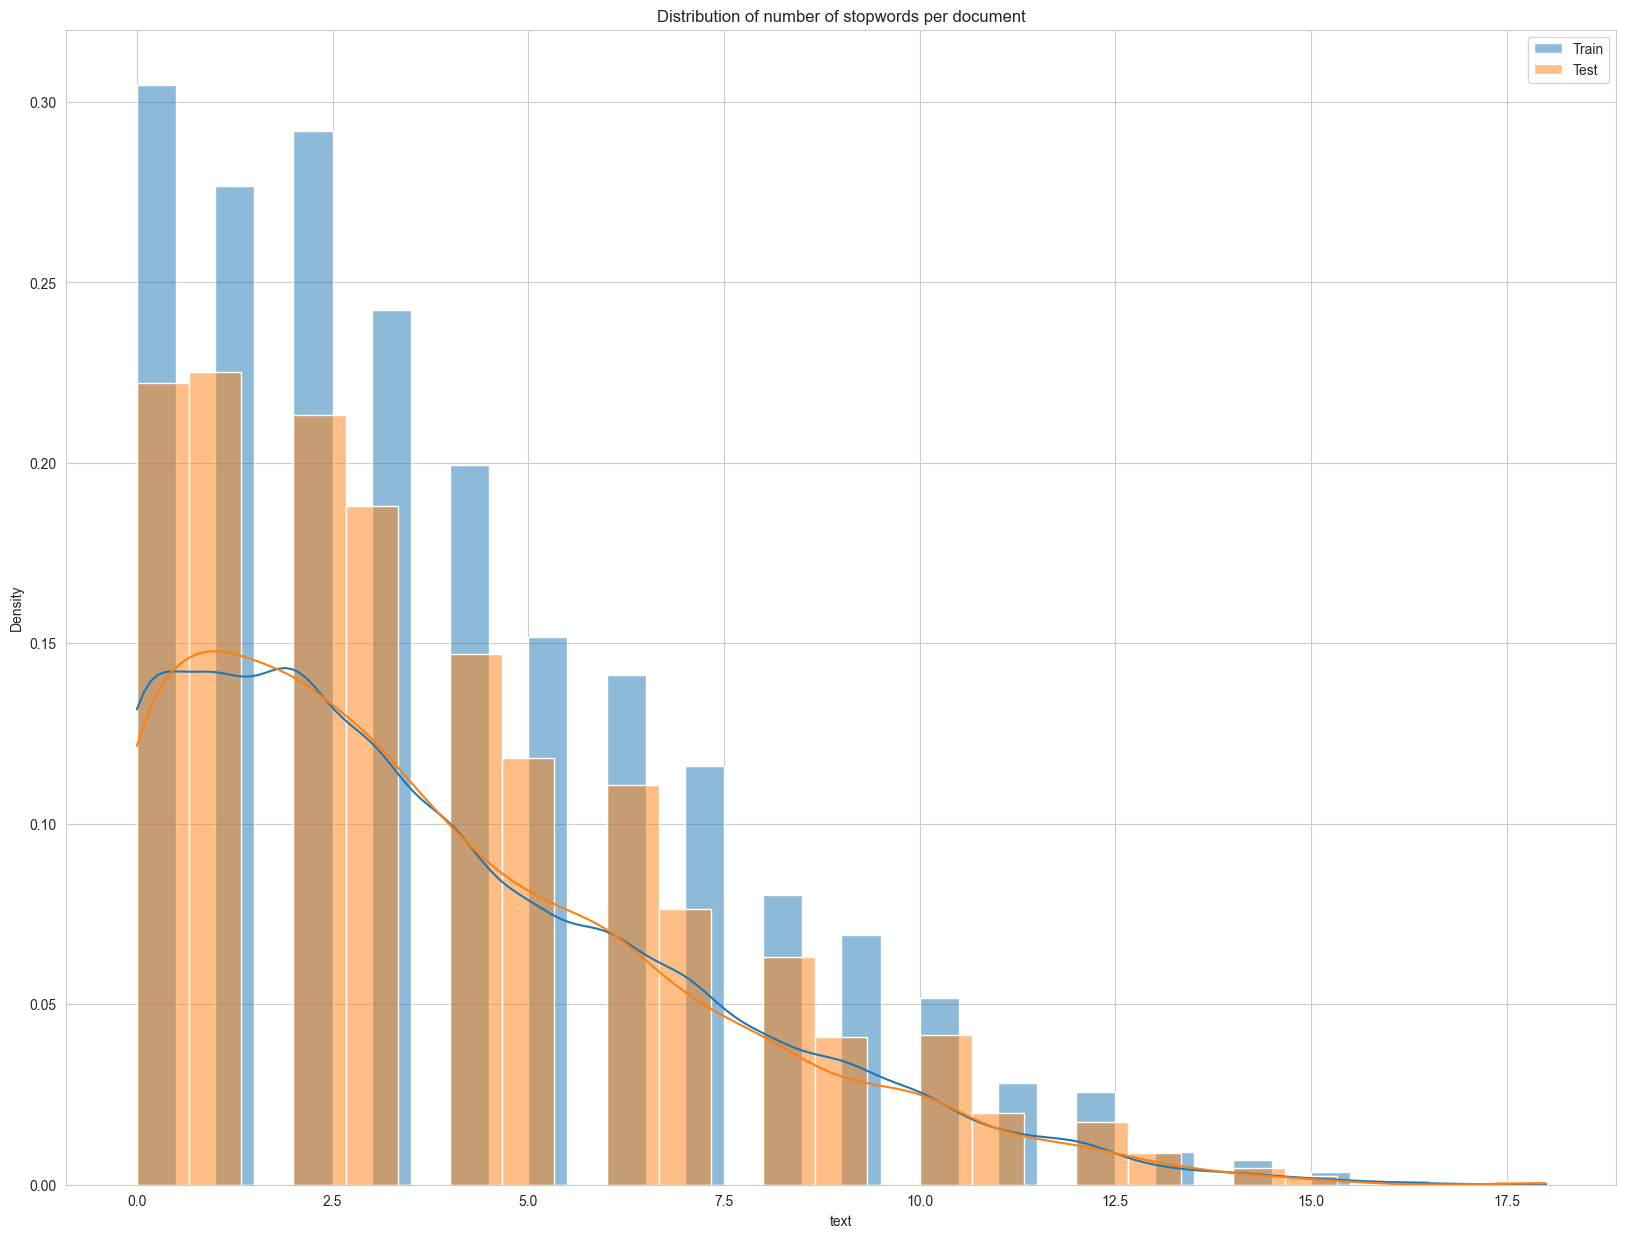

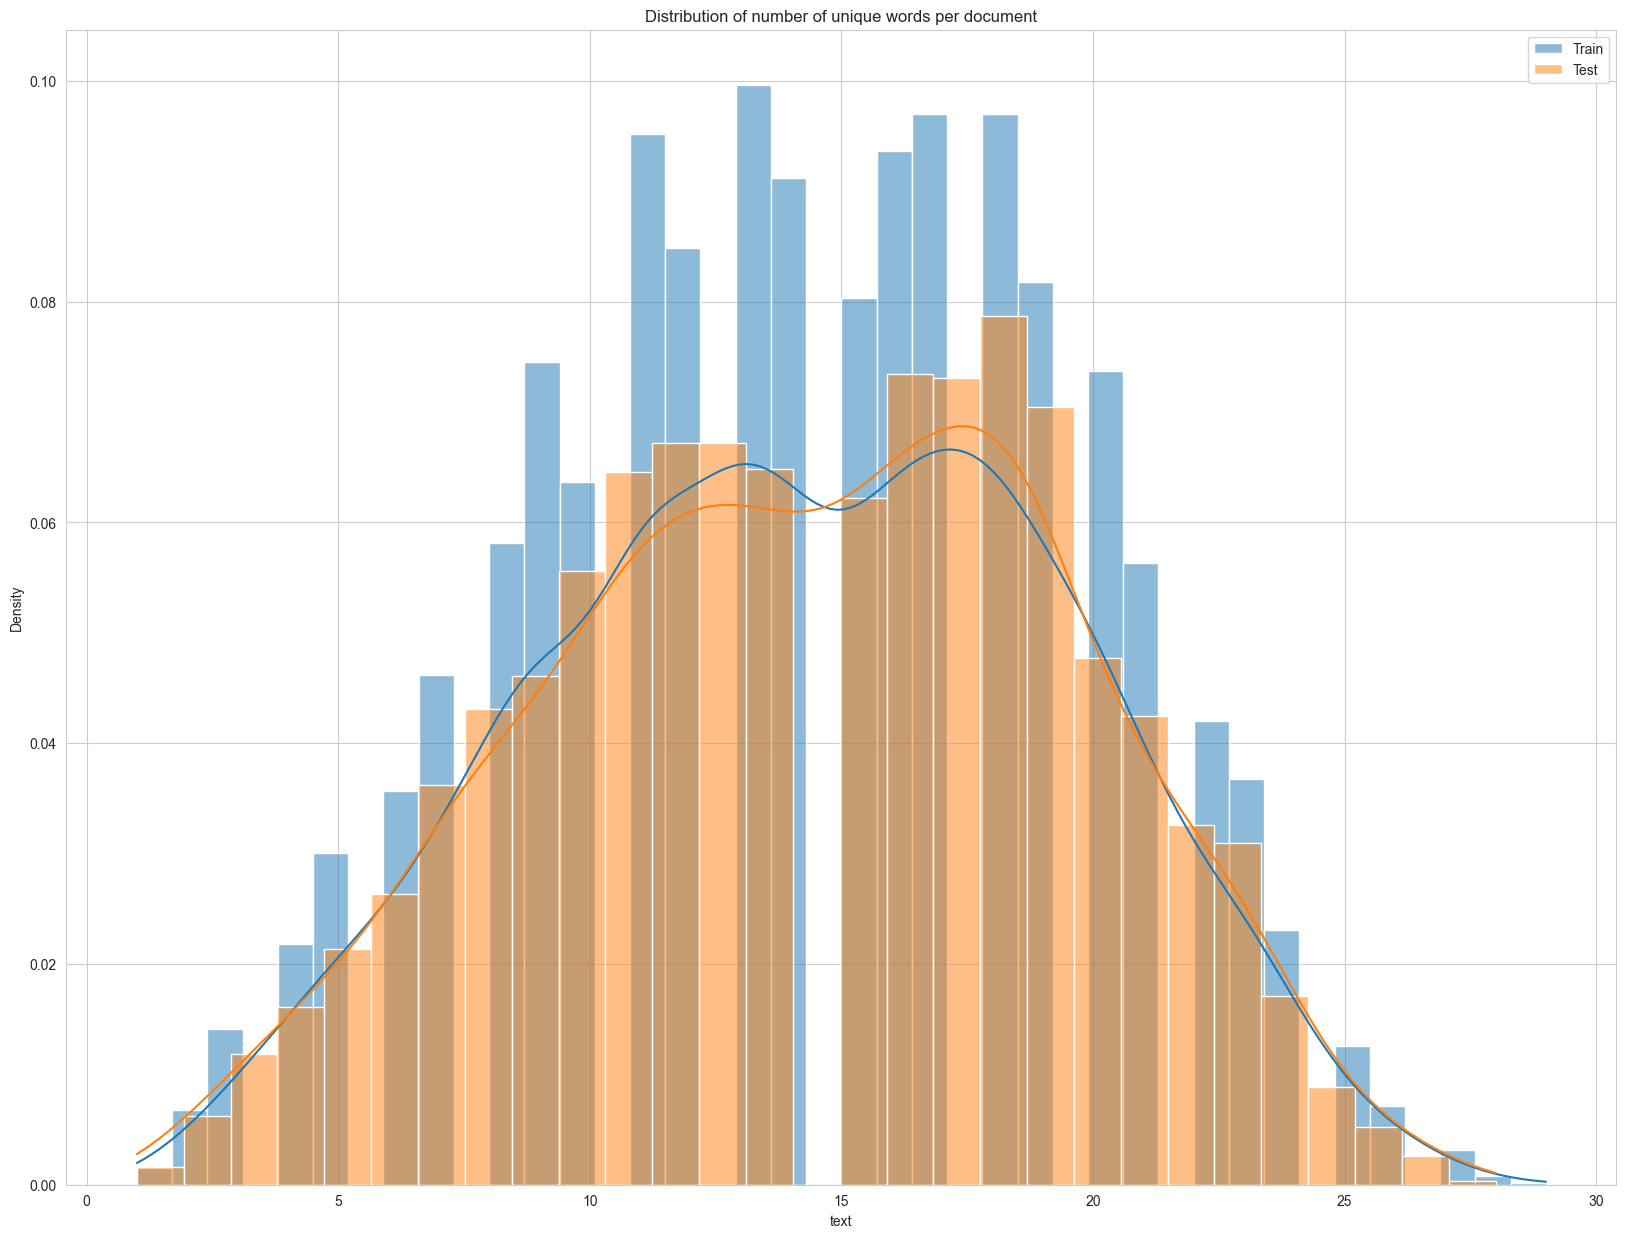

In [16]:
plot_distribution(df_train, df_test, 'text', words_per_doc, 'Distribution of number of words per document')
plot_distribution(df_train, df_test, 'text', chars_per_doc, 'Distribution of number of characters per document')
plot_distribution(df_train, df_test, 'text', avg_word_length_per_doc, 'Distribution of average word length per document')
plot_distribution(df_train, df_test, 'text', stopwords_per_doc, 'Distribution of number of stopwords per document')
plot_distribution(df_train, df_test, 'text', unique_words_per_doc, 'Distribution of number of unique words per document')


---

In [19]:
df_train.loc[37]

id                                                         55
keyword                                                ablaze
location                                         World Wide!!
text        INEC Office in Abia Set Ablaze - http://t.co/3...
target                                                      1
Name: 37, dtype: object